# Chapter 6 lesar -- Exercises 1 and 2

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
MAX_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MAX_SIZE)  # fontsize of the figure title


## Functions given

### phisurf.py
Surface potential

In [2]:
#surface potential
def phisurf(acon,x,y):
    phi = acon*np.sin(np.pi*x)*np.sin(np.pi*y)
    return(phi)

### initsurf.py
Initialize

In [3]:
#initialize
def initsurf(ein,acon):
    #pick x and y so they sit near a well
    x = -.75+1.5*random.random()
    y = -.75+1.5*random.random()
    
    #calculate potential at x,y
    phi=phisurf(acon,x,y)
    
    #find kinetic energy such that total energy is ein
    ki= ein-phi
    
    #pick random velocity components
    vxs = random.random()
    vys = random.random()
    
    #find kinetic energy from random velocities
    ks = 0.5*(vxs**2+vys**2)
    
    #scale velocities so total energy is equal to ein
    vx = vxs*np.sqrt(ki/ks)
    vy = vys*np.sqrt(ki/ks)
    
    return(x,y,vx,vy)

### fsurf.py
Surface force

In [4]:
#surface force
def fsurf(acon,x,y):
    fx = -acon*np.pi*np.cos(np.pi*x)*np.sin(np.pi*y)
    fy = -acon*np.pi*np.sin(np.pi*x)*np.cos(np.pi*y)
    return(fx,fy)

### verletsurf.py
1 step of the Verlet algorithm

In [5]:
# 1 step of the Verlet algorithm
#  input into routine:  
#    (xold,yold)  = position at t-dt
#    (x,y) = position at t
#    (ax,ay) = force (acceleration) at t
#    u = potential energy at t
#  output from routine:
#    k = kinetic energy at t
#    e = total energy at t
#    (xnew,ynew) = position at t+dt
#    unew = potential energy at t+dt
#    (anx,any) = accelerations at t+dt

def verletsurf(xold,yold,x,y,ax,ay,u,dt):
    acon = 1
    xnew = 2*x - xold + ax*dt**2
    ynew = 2*y - yold + ay*dt**2
    vx = (xnew-xold)/(2*dt)
    vy = (ynew-yold)/(2*dt)
    k = .5*(vx**2+vy**2)
    e = k + u
    anx,an_y = fsurf(acon,xnew,ynew)
    unew = phisurf(acon,xnew,ynew)

    return(k,e,xnew,ynew,unew,anx,an_y)

### MDsurf.py
Code for 'atom' on 'surface'

In [6]:
#M code for "atom" on "surface"
#  input:  ein = energy    
#          nsteps = number of time steps
#          st = time step
#  output:  un = list of potential energy at each time step
#           kn = list of kinetic energy at each time step
#           en = list of total energy at each time step
#           xn = list of x coordinate at each time step
#           yn = list of y coordinate energy at each time step

def MDsurf(ein,nsteps,dt):

    # initialize
    acon = 1


    x,y,vx,vy = initsurf(ein,acon)

    u = phisurf(acon,x,y)

    k = .5*(vx**2 + vy**2)
    e = k + u
    ax,ay = fsurf(acon,x,y)
    xold = x - vx*dt + .5*ax*dt**2
    yold = y - vy*dt + .5*ay*dt**2

    #make zeros
    un = np.zeros(nsteps+1)
    kn = np.zeros(nsteps+1)
    en = np.zeros(nsteps+1)
    xn = np.zeros(nsteps+1)
    yn = np.zeros(nsteps+1)
    
    #  start saving data
    un[0] = u
    kn[0] = k
    en[0] = e
    xn[0] = x
    yn[0] = y

    for j in range(nsteps):
        k,e,xnew,ynew,unew,anx,an_y = verletsurf(xold,yold,x,y,ax,ay,u,dt)
        un[j+1] = u
        kn[j+1] = k
        en[j+1] = e
        xn[j+1] = x
        yn[j+1] = y
        xold = x
        yold = y
        x = xnew
        y = ynew
        u = unew
        ax = anx
        ay = an_y

    return (un,kn,en,xn,yn)

## Exercise 1

<i>Using the Verlet algorithm, write and use an MD code to explore the 'atom on surface' problem. Use $E$ as an input parameter. Do not use the periodic boundary conditions so that you can monitor large motions of your atoms.</i>

### Exercise 1a

<i>Vary the time step to explore numerical error. Use plots of the calculated total energy as the measure of whether it is integrated properly</i>

We set the value of $E$ (`ein`) as $10$ and the number of steps (`nsteps`) as $2000$

In [7]:
#values for the energy and the number of time steps
ein = 10
nsteps = 2000

We vary the timestep `dt` and calculate the total energy `en` for each timestep. We use the rule of thumb on page 10 of the exercises to measure our energy fluctuation `flucE`. 
$$\frac{(max(E) - min(E)}{<E>} \approx 10^{-4}$$

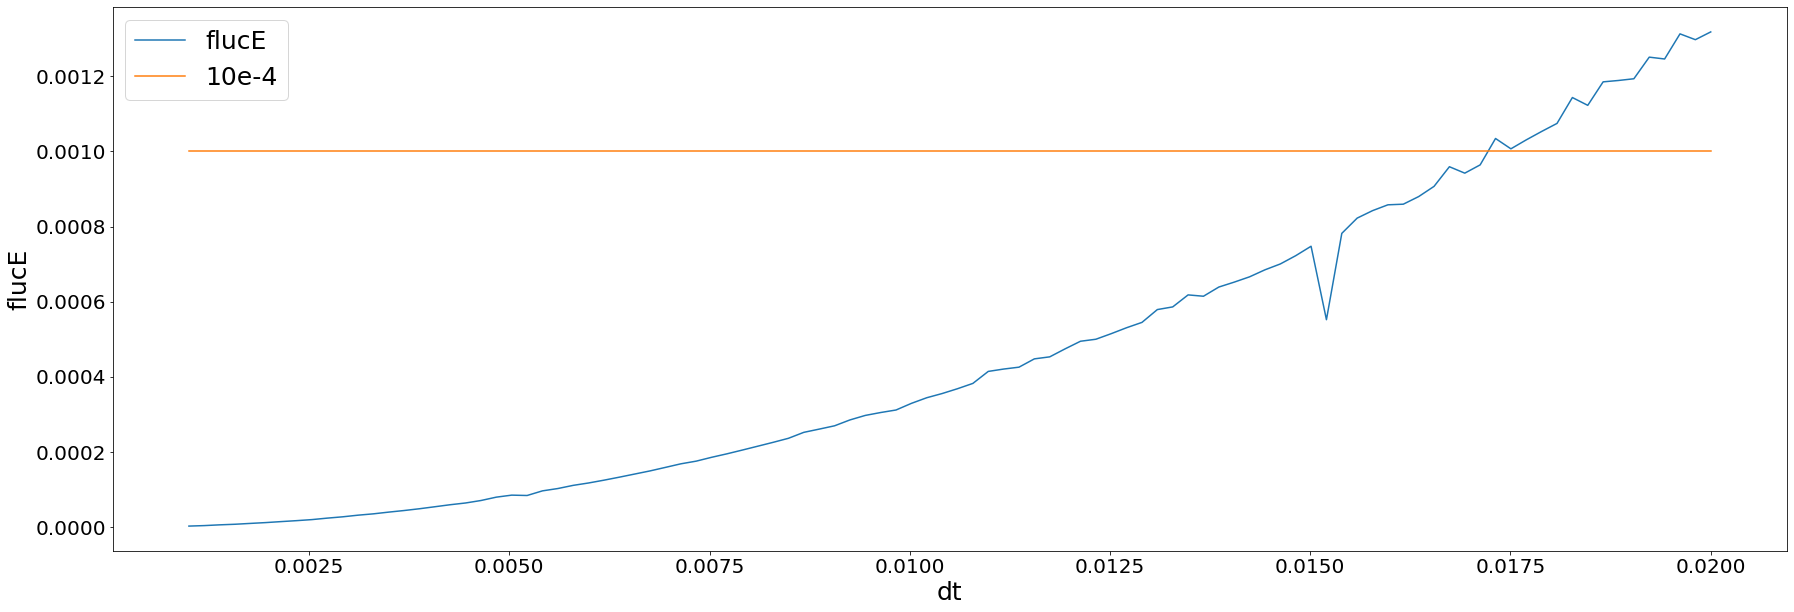

In [8]:
#make a linspace of different time steps
dt = np.linspace(.001, .02, 100)

#make empty arrays of the fluctuation of E and total energy
flucE = np.zeros(len(dt))
en = np.zeros((nsteps+1,len(dt)))

horline = np.zeros(len(dt))

for i in range(len(dt)):
    en[:,i] = MDsurf(ein,nsteps,dt[i])[2]
    flucE[i] = (max(en[:,i])-min(en[:,i]))/(sum(en[:,i])/len(en[:,i]))
    horline[i] = 10e-4


def find_nearest(a, a0):
    "Index in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx

dt_opt = dt[find_nearest(flucE, 10e-4)] 

plt.figure(0,figsize=(30,10))
plt.plot(dt,flucE, label='flucE')
plt.xlabel('dt')
plt.ylabel('flucE')
plt.plot(dt,horline, label='10e-4')
plt.legend()
plt.show()
    
en_opt = MDsurf(ein,nsteps,dt_opt)[2]


We plot the total energy `en_opt` with the optimal timestep `dt_opt` as input:

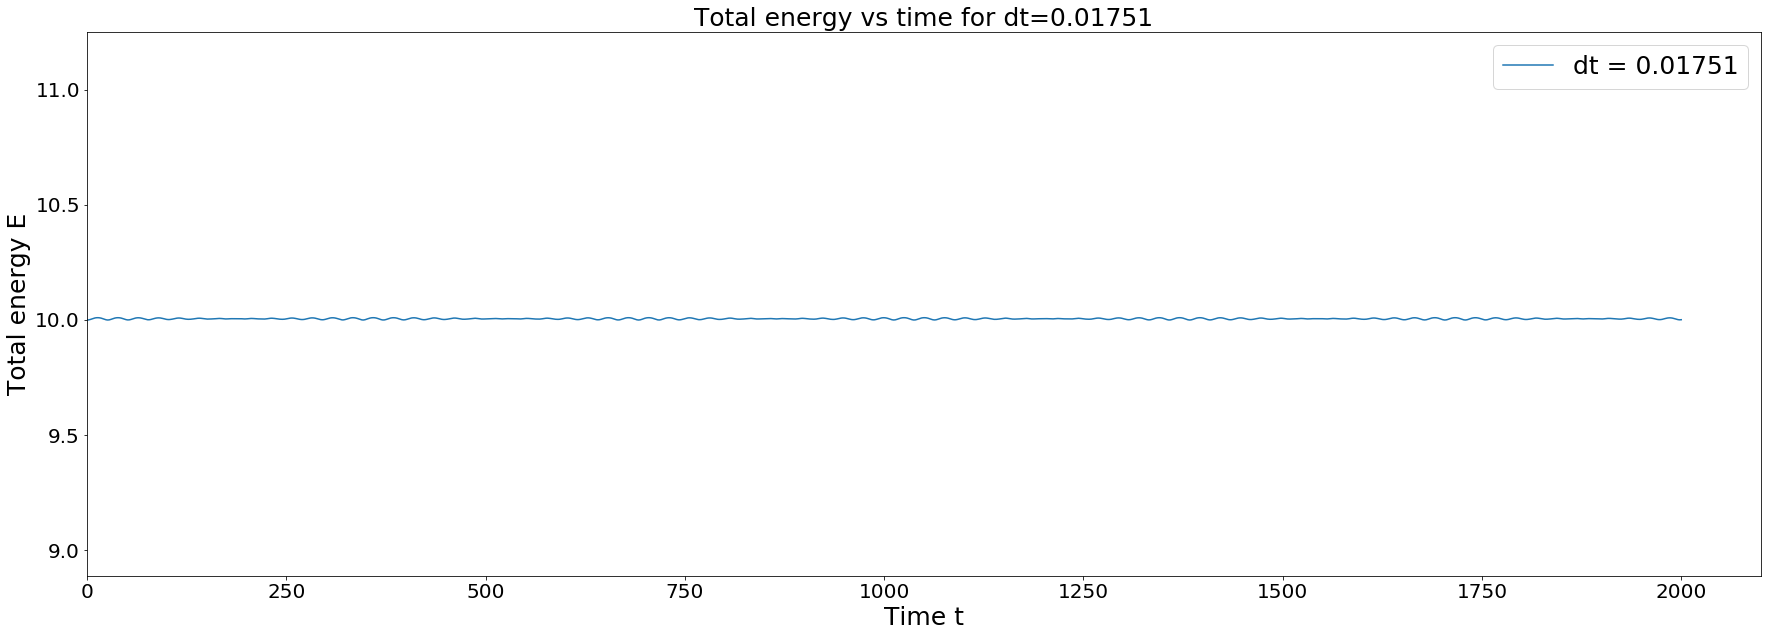

In [9]:
en_opt = MDsurf(ein,nsteps,dt_opt)[2]

plt.figure(1,figsize=(30,10))
plt.clf

plt.title('Total energy vs time for dt=%s' %(round(dt_opt,5)))
plt.plot(en_opt , label='dt = %s' %(round(dt_opt,5))) 

plt.xlabel('Time t')
plt.ylabel('Total energy E')

plt.xlim(0)
plt.ylim([(8/9)*ein,(9/8)*ein])

plt.legend(loc='upper right')
plt.show()

The total energy does not fluctuate much so we have integrated the optimal timestep properly.

### Exercise 1b and 1c

<i>Once you have determined an optimal time step, run calculations at a series of values of $E$, plotting the various energy terms to see the relation between potential, kinetic and total energy. Modify the code to calculate $<U>$ and $<K>$. What is the temperature's relation to $<K>$?</i>

We calculate the other energy terms with the optimal timestep `dt_opt`:

In [10]:
#calculate the energies for the optimal timestep
un,kn,en,xn,yn = MDsurf(ein,nsteps,dt_opt)

We take the average of the kinetic and potential energy with the following lines of code:

In [11]:
#taking the average of k and u (exercise 1c)
avk = sum(kn)/len(kn)
avu = sum(un)/len(un)

Lastly, we plot the energy terms and display their average values:

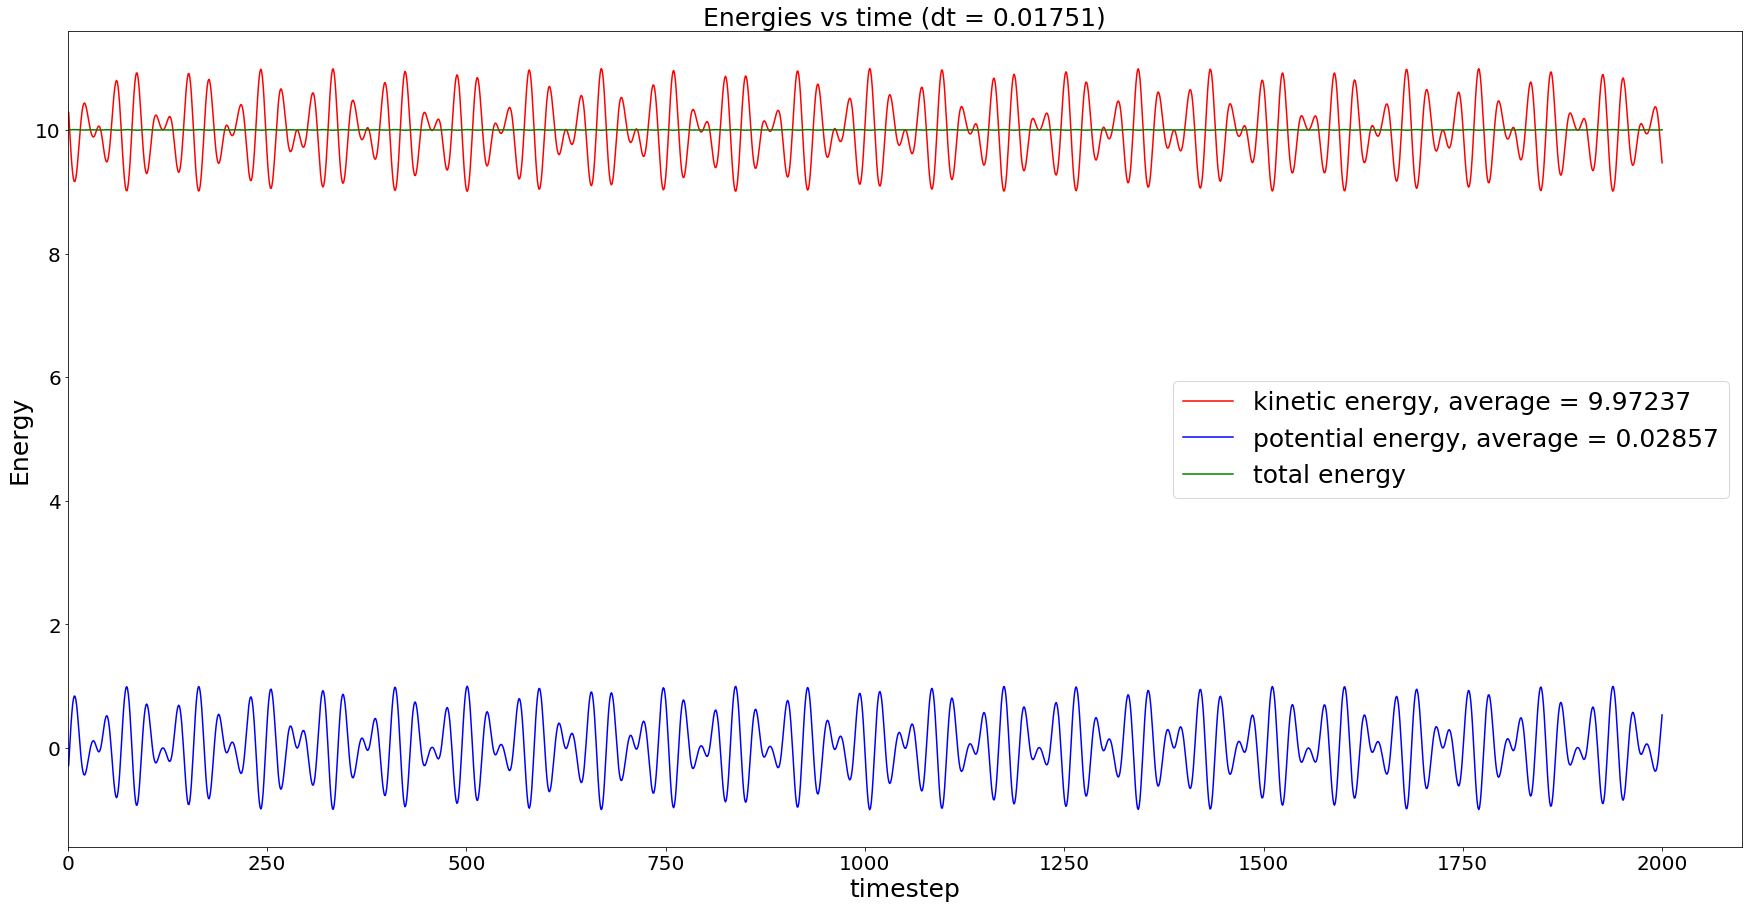

In [12]:
plt.figure(2,figsize=(30,15))
plt.clf

plt.title('Energies vs time (dt = %s)' %(round(dt_opt,5)))
plt.plot(kn, label='kinetic energy, average = %s' %(round(avk,5)), color='red') 
plt.plot(un, label='potential energy, average = %s' %(round(avu,5)), color='blue') 
plt.plot(en, label='total energy', color='green')
plt.xlim(0)
plt.xlabel('timestep')
plt.ylabel('Energy')
plt.legend(loc='center right')
plt.show()

We see that the kinetic and potential energy are each others opposite. This results in the total energy being fairly constant.

### Exercise 1d

<i>For the same calculations, examine the behavior of the atom motion as a function of th energy of the atom. Explore the relationship between the input energy and the ability of the atom to jump out of the well</i>

We make a linspace for the input energy and iterate over the values

In [13]:
#make linspace for input energy
ein_linspace = np.linspace(0.5,5,5)

#make empty array to store positions
xn = np.zeros((nsteps+1,len(ein_linspace)))
yn = np.zeros((nsteps+1,len(ein_linspace)))


#calculate the positions
for i in range(len(ein_linspace)):
    un,kn,en,xn[:,i],yn[:,i] = MDsurf(ein_linspace[i],nsteps,dt_opt)

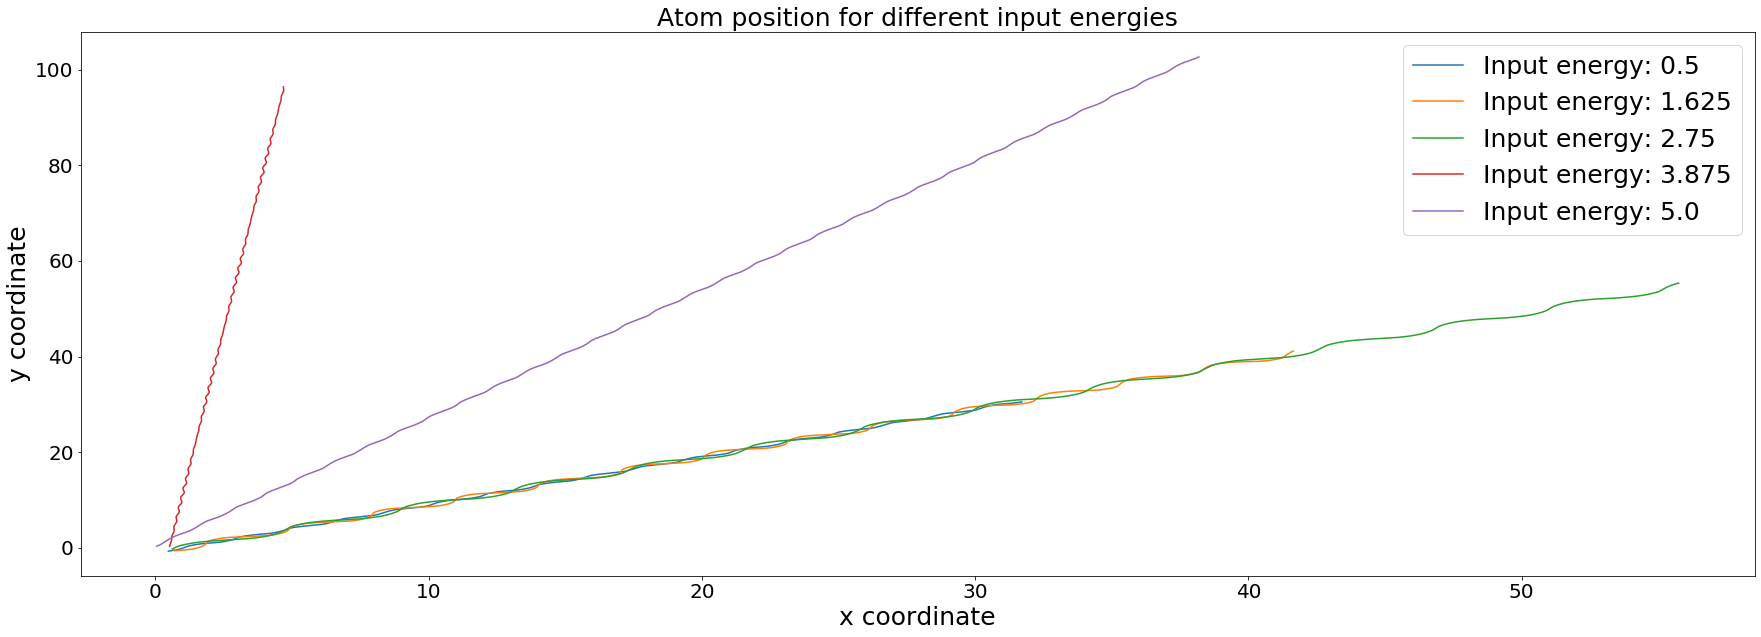

In [14]:
#plot the figure
plt.figure(3, figsize=(30,10))
plt.clf

plt.title('Atom position for different input energies')
for k in range(len(ein_linspace)):
    plt.plot(xn[:,k],yn[:,k], label='Input energy: %s' %(ein_linspace[k])) 


plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

plt.legend(loc='upper right')
plt.show()

We can see that atoms with a high input energy will travel further and will more likely jump out of the potential well.

### Exercise 1e

<i>In all cases, plot the trajectory of the atom relative to the underlying potential.</i>

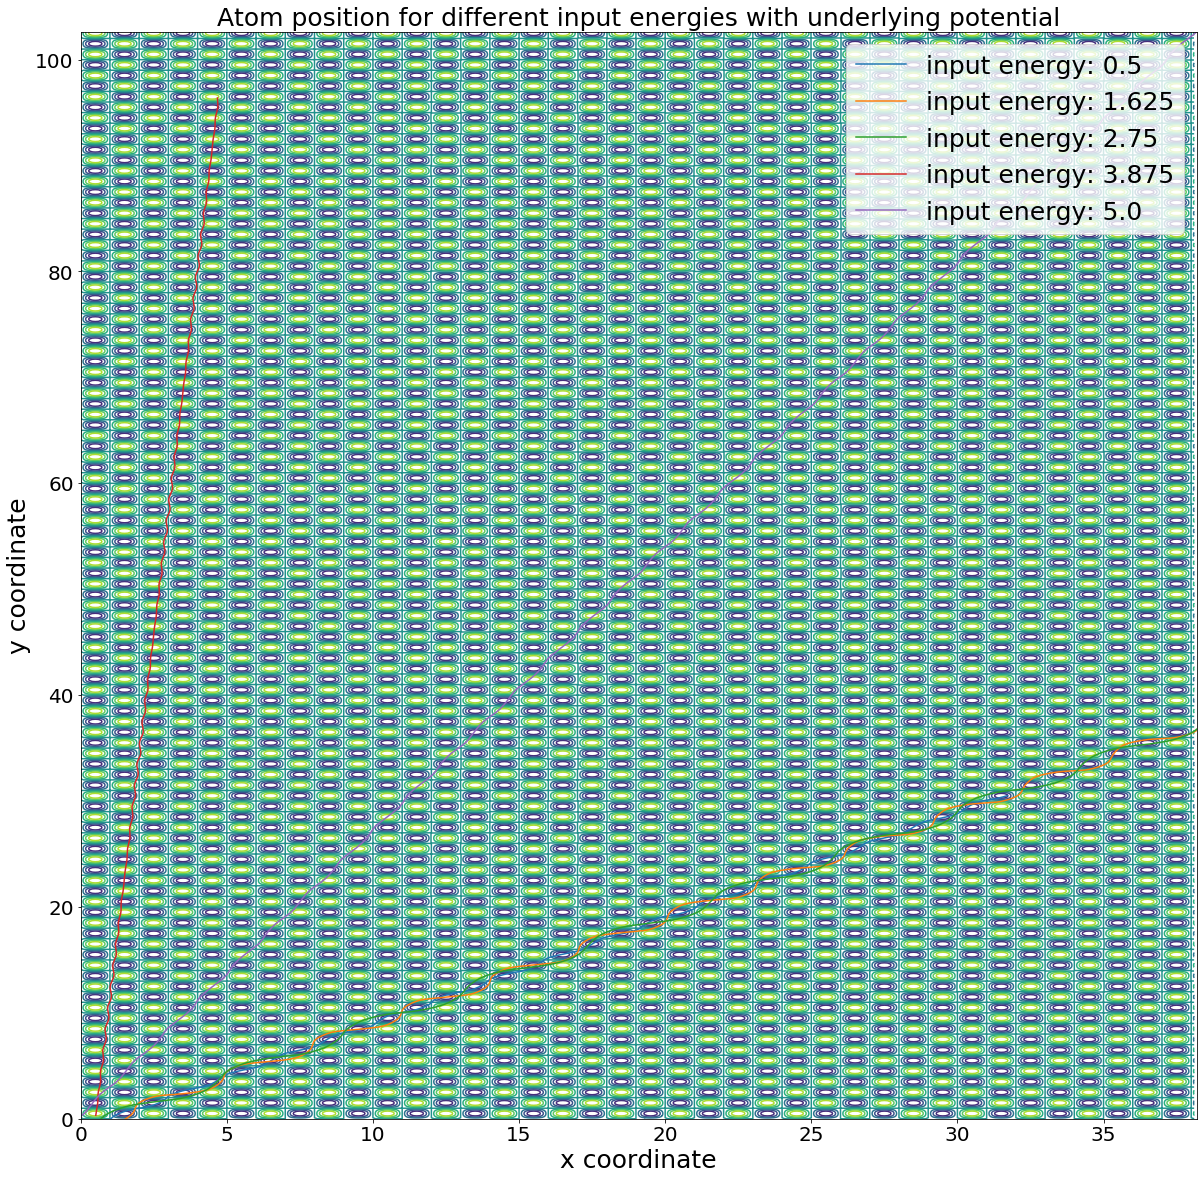

In [22]:
#calculate minima and maxima
xmin = min(xn[:,4])
xmax = max(xn[:,4])
ymin = min(yn[:,4])
ymax = max(yn[:,4])

#make a array of the x and y coordinates
xg = np.arange(0,xmax,.1)
yg = np.arange(0,ymax,.1)

#make a meshgrid
xg,yg = np.meshgrid(xg,yg)

#calculate the surface potential

acon = 1 #arbitrary value
zg = phisurf(acon,xg, yg)

#plot the meshgrid and the atom trajectories
plt.figure(4, figsize=(20,20))
plt.clf

plt.title('Atom position for different input energies with underlying potential')

for k in range(len(ein_linspace)):
    plt.plot(xn[:,k],yn[:,k], label='input energy: %s' %(ein_linspace[k])) 
    
plt.contour(xg,yg,zg)


plt.xlabel('x coordinate')
plt.ylabel('y coordinate')


plt.legend(loc='upper right')


plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.show()

## Exercise 2

<i>Modify the code to include more than one atom and with periodic boundary conditions using the minimum image convention. Choose a system size that includes at least 5 surface units in each direction. Adding more than one atom will require adding the interactions between the atoms using the Lennard-Jones potential (or one of the other potentials from the exercises in Chapter 4).</i>

### initLJMD.py

In [16]:
from numpy import zeros, pi, cos, log, sqrt, heaviside, round
from random import random, seed

In [17]:
def initLJMD(nc, tin):
    """
    #create initial positions and velocities
    #for atomic MD calculation
    #  atoms in fcc structure to start
    #  velocities scaled for a given reduced temperature
    #input:
    #  nc = number of fcc cells
    #     n = number of atoms = 4*nc**3
    #     nc=2, n=32
    #     nc=3, n=108
    #  tin = initial temperature
    #
    #output:
    #  n = number of atoms
    #  [sx,sy,sz] = scaled coordinates
    #  [vx,vy,vz] = scaled velocities
    """
    #  created scaled coordinates in an fcc lattice
    ncell = 4
    x = [0, .5, 0, .5]
    y = [0, .5, .5, 0]
    z = [0, 0, .5, .5]
    i1 = 0
    n = ncell*nc**3
    sx = zeros(n, float)
    sy = zeros(n, float)
    sz = zeros(n, float)
    vx = zeros(n, float)
    vy = zeros(n, float)
    vz = zeros(n, float)
    for k in range(nc):
        for l in range(nc):
            for m in range(nc):
                for i in range(ncell):
                    sx[i1] = (x[i] + k-1)/nc
                    sy[i1] = (y[i] + l-1)/nc
                    sz[i1] = (z[i] + m-1)/nc
                    i1 = i1+1
    #  pick velocities from Maxwell-Boltzmann distribution
    #  for any temperature we want.
    #  Then we will calculate the kinetic energy and thus
    #  the temperature of these atoms and then we will
    #  rescale the velocities to the correct temperature
    k = 0
    px = 0
    py = 0
    pz = 0
    for i in range(n):
        vx[i] = sqrt(-2*log(random()))*cos(2*pi*random())
        vy[i] = sqrt(-2*log(random()))*cos(2*pi*random())
        vz[i] = sqrt(-2*log(random()))*cos(2*pi*random())
        px = px + vx[i]
        py = py + vy[i]
        pz = pz + vz[i]
    # set net momentum to zero and calcuate K
    px = px/n
    py = py/n
    pz = pz/n
    vx -= px
    vy -= py
    vz -= pz
    vx2 = vx**2
    vy2 = vy**2
    vz2 = vz**2
    k = 0.5*(vx2.sum()+vy2.sum()+vz2.sum())
    # ~ for i in range(n):
        # ~ vx[i] = vx[i]-px
        # ~ vy[i] = vy[i]-py
        # ~ vz[i] = vz[i]-pz
        # ~ k = k + vx[i]**2 + vy[i]**2 + vz[i]**2
    # ~ k = .5*k
    # kinetic energy of desired temperature (tin)
    kin = 3*n*tin/2
    # rescale velocities
    sc = sqrt(kin/k)
    vx *= sc
    vy *= sc
    vz *= sc
    # ~ for i in range(n):
        # ~ vx[i] = vx[i]*sc
        # ~ vy[i] = vy[i]*sc
        # ~ vz[i] = vz[i]*sc
    return n, sx, sy, sz, vx, vy, vz

### fLJsum.py

In [18]:
def fLJsum(a, n, rc, x, y, z):
    """
    simple lattice sum for force with cutoffs and 
    minimum image convention
    
     we calculate force (fx,fy,fz), energy (u), and
        part of the pressure (w)
    """
    #  set force components, potential energy, and pressure to 0
    fx = zeros(n, float)
    fy = zeros(n, float)
    fz = zeros(n, float)
    u = 0
    w = 0
    for i in range(n-1):  # note limits
        ftx = 0
        fty = 0
        ftz = 0
        for j in range(i+1,n):  #  note limits
    # mimimum image convention
            dx = x[j] - x[i]
            dy = y[j] - y[i] 
            dz = z[j] - z[i]
            dx = dx - round(dx)
            dy = dy - round(dy)
            dz = dz - round(dz)
            dist = a*sqrt(dx**2 + dy**2 + dz**2)
            if(dist < 1e-5):
                print("dist zero:",dist,i,j)
            if dist <= rc:
#                print( dist)
                dphi = (2/dist**(12)-1/dist**6)
                ffx = dphi*a*dx/dist**2
                ffy = dphi*a*dy/dist**2
                ffz = dphi*a*dz/dist**2
                ftx = ftx + ffx
                fty = fty + ffy
                ftz = ftz + ffz
                phi = (1/dist**(12)-1/dist**6)
                u = u +  phi
                w = w + dphi
    #  add -f to sum of force on j
                fx[j] = fx[j] - ffx
                fy[j] = fy[j] - ffy
                fz[j] = fz[j] - ffz
      #  sum up force on i (fi)
        fx[i] = fx[i] + ftx
        fy[i] = fy[i] + fty
        fz[i] = fz[i] + ftz
    #  need to multiply LJ by 4 and force and pressure by 24
    #  also need to correct sign in f 
    u = 4*u
    w = 24*w
    fx *= -24
    fy *= -24
    fz *= -24
    # ~ for i in range(n):
        # ~ fx[i] = -24*fx[i]
        # ~ fy[i] = -24*fy[i]
        # ~ fz[i] = -24*fz[i]
    return u, w, fx, fy, fz

### MDLJ.py

In [19]:
def MDLJ(nc,density,tin,nsteps,dt):
    """
    # MD code for 3D system of LJ atoms
    #  input:  nc = number of cells of fcc unit cell
    #          density = density of LJ system
    #          tin = initial temperature
    #          nsteps = number of time steps
    #          dt = time step

    #  output:  un = potential energy at each time step
    #           kn = kinetic energy at each time step
    #           en = total energy at each time step
    #           tn = temperature at each time step
    #           pn = pressure at each time step
    """
    # initialize positions and velocities
    n, x, y, z, vx, vy, vz = initLJMD(nc, tin)

    # calculate some useful quantities
    vol = n/density
    a = vol**(1/3)
    rc = a/2

    # calculate initial energy and forces
    u, w, fx, fy, fz = fLJsum(a, n, rc, x, y, z)

    # now start the time stepping with the verlet algorithm
    # initialize variables
    xold = zeros(n,float)
    yold = zeros(n,float)
    zold = zeros(n,float)
    xnew = zeros(n,float)
    ynew = zeros(n,float)
    znew = zeros(n,float)

    un = zeros(nsteps,float)
    kn = zeros(nsteps,float)
    en = zeros(nsteps,float)
    tn = zeros(nsteps,float)
    pn = zeros(nsteps,float)

    # first find the positions at t-dt
    xold = x -vx*dt/a+0.5*fx*dt**2/a
    yold = y -vy*dt/a+0.5*fy*dt**2/a
    zold = z -vz*dt/a+0.5*fz*dt**2/a

    # start the time steps
    for j in range(nsteps):
        k = 0
     #  find positions for time t + dt
     #  find velocities for time t
     #  find kinetic energy for time t
        xnew = 2*x - xold + fx*dt**2/a
        ynew = 2*y - yold + fy*dt**2/a
        znew = 2*z - zold + fz*dt**2/a
        vx = a*(xnew - xold)/(2*dt)
        vy = a*(ynew - yold)/(2*dt)
        vz = a*(znew - zold)/(2*dt)
        vx2 = vx**2
        vy2 = vy**2
        vz2 = vz**2
        k = 0.5*(vx2.sum()+vy2.sum()+vz2.sum())
#        for i in range(n):
#            xnew[i] = 2*x[i] - xold[i] + fx[i]*dt**2/a
#            ynew[i] = 2*y[i] - yold[i] + fy[i]*dt**2/a
#            znew[i] = 2*z[i] - zold[i] + fz[i]*dt**2/a
#            vx[i] = a*(xnew[i] - xold[i])/(2*dt)
#            vy[i] = a*(ynew[i] - yold[i])/(2*dt)
#            vz[i] = a*(znew[i] - zold[i])/(2*dt)
#            k = k + vx[i]**2 + vy[i]**2 + vz[i]**2
#        k = .5*k
        temp = 2*k/(3*n)
    #  create time series of values
        e = k + u
        un[j] = u/n
        kn[j] = k/n
        en[j] = e/n
        tn[j] = temp
        pn[j] = density*temp + w/(3*vol)

    # reset positions for next time step
        xold[:] = x
        yold[:] = y
        zold[:] = z
        x[:] = xnew
        y[:] = ynew
        z[:] = znew
#        for i in range(n):
#            xold[i] = x[i]
#            yold[i] = y[i]
#            zold[i] = z[i]
#            x[i] = xnew[i]
#            y[i] = ynew[i]
#            z[i] = znew[i]
    # calculate force and energy at new positions for next cycle
        u, w, fx, fy, fz = fLJsum(a, n, rc, x, y, z)

    return un, kn, en, tn, pn, x, y, z

### Exercise 2a

In [20]:
nc = 5
density = 1
tin = 1
dt = dt_opt
nsteps = int(1/dt_opt)

un, kn, en, tn, pn, x, y, z = MDLJ(nc,density,tin,nsteps,dt)


# multiply the positions by the number of cells
x,y,z = nc*x,y*nc,z*nc

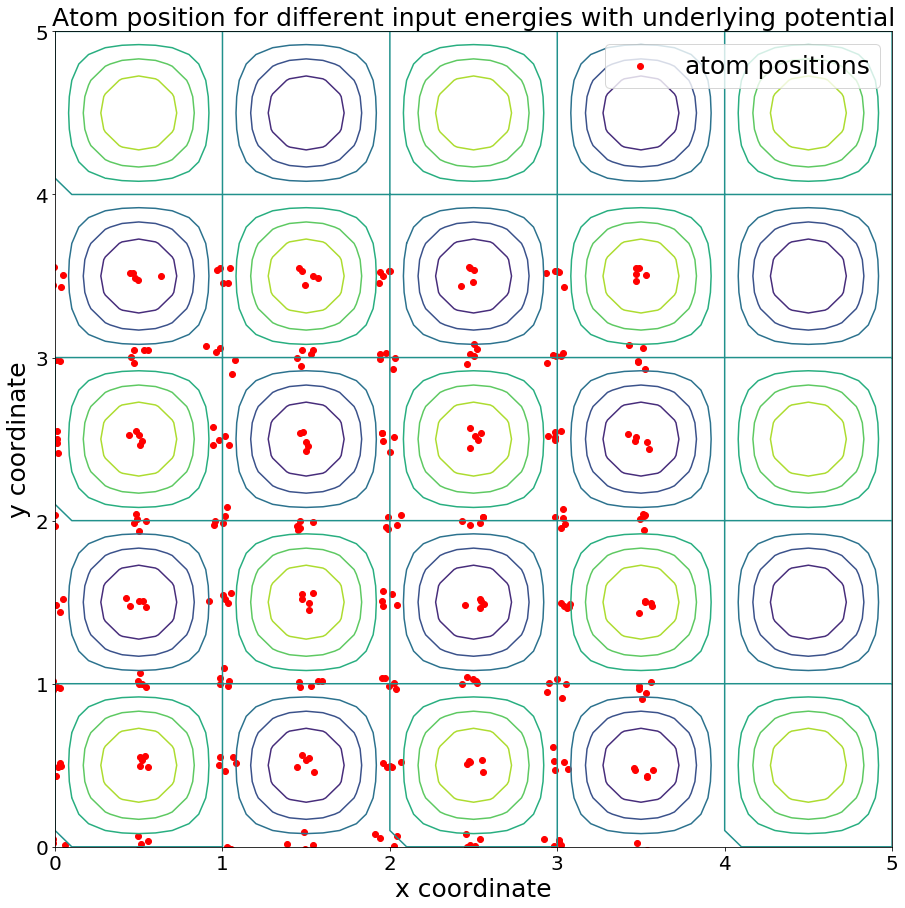

In [21]:
#calculate minima and maxima
xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

xmin, xmax = -5,5
ymin, ymax = -5,5

#make a array of the x and y coordinates
xg = np.arange(0,5*xmax,.1) #xmax
yg = np.arange(0,5*ymax,.1) #ymax

#make a meshgrid
xg,yg = np.meshgrid(xg,yg)

#calculate the surface potential

acon = 1 #arbitrary value
zg = phisurf(acon,xg, yg)

#plot the meshgrid and the atom trajectories
plt.figure(4, figsize=(15,15))
plt.clf

plt.title('Atom position for different input energies with underlying potential')

plt.contour(xg,yg,zg)
plt.scatter(x,y, color="red", label='atom positions')

plt.xlabel('x coordinate')
plt.ylabel('y coordinate')


plt.legend(loc='upper right')


plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.show()